In [14]:
import pandas as pd 

df = pd.read_csv('../data/november_full_data_encoded.csv')
df.head()

,airline_code,num_code,dep_time,time_taken,price,Routine,departure_time
0,0,975,5.750000,45,742800,0,0
1,0,953,20.666667,45,742800,0,1
2,0,981,21.666667,45,805800,0,1
3,0,927,9.500000,45,810000,0,2
4,0,993,12.833333,45,810000,0,3


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis = 1)
y = df['price']
X_train_OR, X_test_OR, y_train_OR, y_test_OR = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_OR, y_train_OR)

RandomForestRegressor(random_state=42)

Mean Squared Error on train: 89411712597.24133
R-squared on train: 0.7414700601565574
------------------------------------------------------
Mean Squared Error on test: 102732894779.58133
R-squared on test: 0.7040676716156606


C:\Users\dinhg\AppData\Local\Temp\ipykernel_19100\1482954630.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette='Blues')


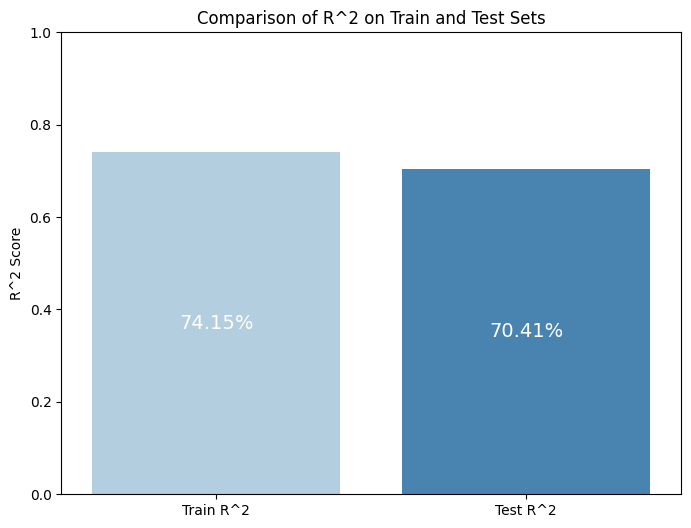

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_OR_train = rf_model.predict(X_train_OR)
y_pred_OR_test = rf_model.predict(X_test_OR)

mse_train = mean_squared_error(y_train_OR, y_pred_OR_train)
r2_train = r2_score(y_train_OR, y_pred_OR_train)
mse_test = mean_squared_error(y_test_OR, y_pred_OR_test)
r2_test = r2_score(y_test_OR, y_pred_OR_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)
plt.show()

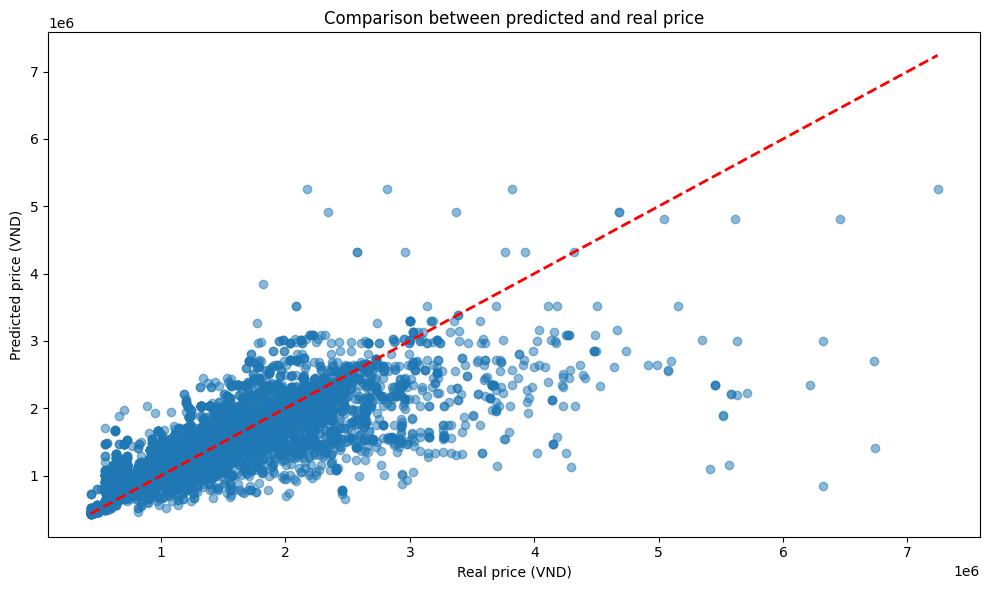

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_OR, y_pred_OR_test, alpha=0.5)
plt.plot([y_test_OR.min(), y_test_OR.max()], [y_test_OR.min(), y_test_OR.max()], 'r--', lw=2)

plt.xlabel('Real price (VND)')
plt.ylabel('Predicted price (VND)') 
plt.title('Comparison between predicted and real price')

plt.tight_layout()
plt.show()


In [22]:
new_flight = [[0, 975, 5.75, 45, 0, 0]]  # [airline_code, num_code, dep_time, time_taken, Routine, departure_time]
# [Vietnam Airlines, 975, 5h45, 45, SG-QN, Early_Morning]
predicted_price = rf_model.predict(new_flight)

print("Flight price:", predicted_price[0], "VND")


Flight price: 742800.0 VND


C:\Users\dinhg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
